# Банки — Анализ оттока клиентов

**Цели проекта**  

От отдела маркетинга, а именно от менеджера по маркетинговым кампаниям, поступил запрос: в банке последнее время повысился отток клиентов, что становится стабильной проблемой и существование банка ставится под угрозу.

Наша задача максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока клиентов.

Ранее исследование уже проводили, но так как состав клиентов изменился, то старые сегменты не подходят. Следовательно исследование стало не актуально и выявить по нему текущую проблему невозможно.




**Описание данных**  

Работа будет проводиться с актуальными на текущий момент данными о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  

user_id — идентификатор пользователя  
score — баллы кредитного скоринга  
city — город  
gender — пол  
age — возраст  
equity — количество баллов собственности  
balance — баланс на счёте  
products — количество продуктов, которыми пользуется клиент  
credit_card — есть ли кредитная карта  
last_activity — активный клиент  
est_salary — оценочный доход клиента  
сhurn — признак оттока  

**Этапы анализа**  

1. Загрузка данных и подготовка к исследованию:  
   * Изучение структуры датасета.  
   * Обработка пропусков.  
   * Обработка дубликатов.  
   * Корректировка типов данных.  


2. Исследовательский анализ данных:  
   * Анализ типичных портретов клиентов и сравнение их сегментов.
   * Распределение ключевых признаков и их связь с оттоком.
   * Оценка уровней оттока по различным категориям.
   * Проведение корреляционного анализа.


3. Проверка статистических гипотез. Чем больше у клиента продуктов, тем выше вероятность ошибки со стороны банка или не знания клиента о всех возможностях карт.  
   * У отточных и оставшихся клиентов одинаковое количество продуктов  
   * Влияния количества продуктов на отток нет  
   

4. Сегментация на основе стратегических показателей:  
   * Анализ поведения внутри сегментов.  
   * Выявление уникальных характеристик каждого сегмента.  
   * Оценка потенциального влияния сегментации на отток.  


5. Выводы и рекомендации:  
   * Формулирование выводов на основе проведенной работы.  
   * Предоставление рекомендаций по улучшению ситуации с оттоком клиентов.  


6. Презентация:  
   * Подготовка презентации с ключевыми результатами и рекомендациями.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from plotly import graph_objects as go

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/')
except:
    data = pd.read_csv('/datasets/bank_scrooge.csv')

## Загрузка данных и подготовка к исследованию

In [3]:
#посмотрим общую инфомацию датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
#сразу приведем названия колонок к единому стилю
data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace=True)

In [5]:
data['city'] = data['city'].astype('category')
data['gender'] = data['gender'].astype('category')

In [6]:
#закодируем данные города и пола
category_columns = ['city', 'gender']
data = pd.get_dummies(data, columns=category_columns, drop_first=False)
display(data.columns.tolist())

['user_id',
 'score',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn',
 'city_Ростов',
 'city_Рыбинск',
 'city_Ярославль',
 'gender_Ж',
 'gender_М']

In [7]:
#посмотрим пропуски в балансе
dbalance = data[data['balance'].isnull()]
dbalance.head(30)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,0,0,1,1,0
10,148929,927.0,52.0,0,NaN,1,1,1,196820.07,0,1,0,0,0,1
11,172184,921.0,41.0,0,NaN,1,1,1,217469.48,0,1,0,0,0,1
19,127034,922.0,53.0,0,NaN,1,0,0,147094.82,0,0,1,0,1,0
21,177415,896.0,47.0,0,NaN,1,0,0,225060.35,0,0,1,0,1,0
30,155730,946.0,47.0,0,NaN,2,1,1,660015.85,0,0,0,1,1,0
34,205226,944.0,35.0,0,NaN,2,1,1,239843.39,0,0,0,1,0,1
39,173175,924.0,51.0,0,NaN,1,1,1,248844.47,0,0,1,0,1,0
43,228585,956.0,41.0,0,NaN,1,1,0,115117.10,0,1,0,0,0,1


In [8]:
data['balance_empty'] = data['balance'].isnull().astype(int)
data[['balance', 'balance_empty']].head(10)

,balance,balance_empty
0,59214.82,0
1,850594.33,0
2,NaN,1
3,1524746.26,0
4,174.00,0
5,863687.24,0
6,405042.44,0
7,458145.40,0
8,1206337.87,0
9,NaN,1


In [9]:
dbalance = data[(data['churn'] == 1) & (data['balance'].isnull())].head(30)
dbalance

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
1273,136567,961.0,31.0,0,NaN,1,1,0,1015386.14,1,0,0,1,0,1,1
1400,146876,707.0,24.0,0,NaN,3,1,0,94091.11,1,0,0,1,0,1,1
3017,123230,980.0,53.0,0,NaN,1,1,1,327646.02,1,0,1,0,1,0,1
4118,157443,727.0,69.0,0,NaN,1,1,0,132546.93,1,1,0,0,0,1,1
4302,167482,955.0,62.0,0,NaN,1,1,0,157784.96,1,0,0,1,0,1,1
5578,136508,739.0,49.0,0,NaN,2,1,1,280945.17,1,0,1,0,0,1,1
6827,205707,953.0,30.0,0,NaN,3,1,0,157069.20,1,0,0,1,0,1,1
7572,144559,748.0,45.0,0,NaN,1,1,0,288756.23,1,0,0,1,0,1,1
8185,116284,743.0,48.0,0,NaN,1,1,1,634457.21,1,0,0,1,0,1,1
8611,195981,763.0,48.0,0,NaN,1,1,0,248232.39,1,0,0,1,1,0,1


В основном отточные клиенты с пустым балансом из Рыбинска или Ярославля. Из Ростова всего 1 клиент. В основном это женщины, с 1 - мксимум 3 продуктами. Один из них - кредитная карта.

Сделать однозначный вывод, почему в графе с балансом пропуск, мы не можем.
Во избежание искажения данных пропуски оставим. Для дальнейшего анализа добавили колонку balance_empty, где 0 - поле баланса заполнено, и 1 - поле баланса не заполнено. 

In [10]:
dage = data[data['age'].isnull()]
dage.head(30)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
1247,228075,932.0,NaN,5,7601719.20,2,1,1,408121.16,0,0,0,1,0,1,0
2165,187635,692.0,NaN,0,NaN,1,1,1,160368.82,0,0,1,0,1,0,1
2444,221156,913.0,NaN,0,NaN,1,1,1,135693.24,0,0,0,1,0,1,1
3091,138660,836.0,NaN,5,294315.53,2,0,1,63310.22,1,1,0,0,1,0,0
4912,210674,834.0,NaN,1,238330.52,2,0,1,93775.06,0,0,1,0,0,1,0
5470,218868,827.0,NaN,4,448959.07,2,1,1,67835.95,0,0,1,0,1,0,0
5495,151662,884.0,NaN,0,NaN,1,1,1,137500.77,0,0,1,0,1,0,1
7236,210135,908.0,NaN,4,1120340.31,3,1,1,85002.15,0,0,1,0,1,0,0
7248,219343,920.0,NaN,0,NaN,1,1,0,159248.67,0,0,1,0,1,0,1
7345,184913,829.0,NaN,3,188648.77,2,0,1,75206.90,0,0,0,1,1,0,0


In [11]:
data = data.dropna(subset=['age'])

In [12]:
data.isnull().sum()

user_id              0
score                0
age                  0
equity               0
balance           2279
products             0
credit_card          0
last_activity        0
est_salary           0
churn                0
city_Ростов          0
city_Рыбинск         0
city_Ярославль       0
gender_Ж             0
gender_М             0
balance_empty        0
dtype: int64

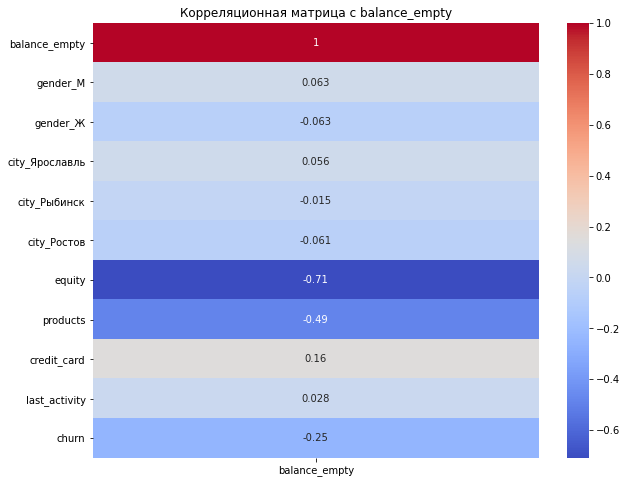

In [13]:
columns_corr = ['gender_М', 'gender_Ж', 'city_Ярославль', 'city_Рыбинск', 
                       'city_Ростов', 'equity', 'products', 'credit_card', 
                       'last_activity', 'churn']

corr_matrix = data[columns_corr + ['balance_empty']].corr()

corr_matrix = data[['balance_empty'] + columns_corr].corr()[['balance_empty']]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица с balance_empty')
plt.show()

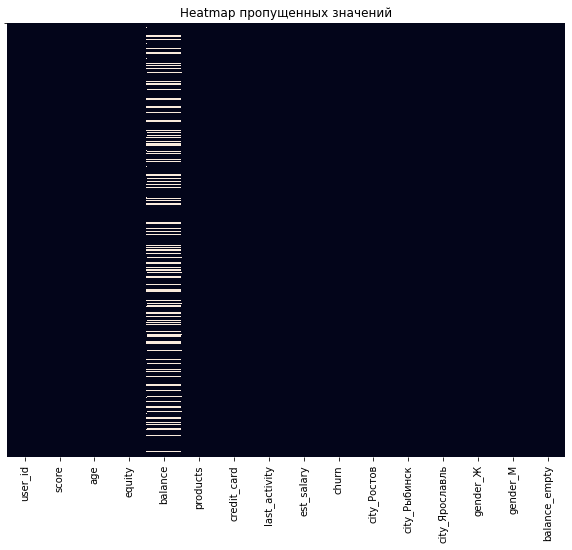

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, yticklabels=[''])
plt.title('Heatmap пропущенных значений')
plt.show()

На корреляционной матрице есть отрицательные значения с оценкой собственности, количеством продуктов и оттоком.   
А на карте видим, что распределение пропусков случайно и равномерно, что может говорить о том, что пропуски не зависят от определенных данных.  
Их заполнение или удаление значительно исказит результат. Поэтому удалять или заполнять их не будем.


Так как на корреляционной матрице есть зависимость от определеных признаков, то пропуски можно отнести к MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.  
На следующем этапе будут проведены исследования по каждому признаку.  

In [15]:
#проверим, что все нужные столбцы есть
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,1
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0


In [16]:
#посмотрим дубликаты
duplicates = data[data.duplicated(subset='user_id', keep=False)]
display(duplicates)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
58,164676,860.0,37.0,5,648594.03,2,1,1,213586.86,1,0,0,1,0,1,0
150,185748,850.0,36.0,5,1203376.67,2,0,1,89401.82,1,0,1,0,0,1,0
161,197364,928.0,53.0,6,1347183.86,2,0,1,168189.49,1,0,1,0,1,0,0
231,190253,823.0,37.0,4,373348.39,2,0,1,131947.92,1,0,1,0,0,1,0
690,152479,768.0,42.0,0,126787.79,4,1,1,143233.23,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,195884,767.0,45.0,1,335652.56,3,1,1,100197.67,0,0,1,0,1,0,0
9775,124450,758.0,36.0,0,73574.07,2,0,1,79963.59,0,0,1,0,1,0,0
9785,168998,895.0,44.0,0,282653.53,3,0,0,255296.47,0,0,1,0,0,1,0
9880,217412,886.0,35.0,3,1026172.14,2,1,0,53099.16,0,0,0,1,1,0,0


In [17]:
data.query('user_id == 217412')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
7055,217412,879.0,42.0,5,568140.15,3,0,0,231658.67,1,0,1,0,0,1,0
9880,217412,886.0,35.0,3,1026172.14,2,1,0,53099.16,0,0,0,1,1,0,0


In [18]:
data.query('user_id == 185748')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
150,185748,850.0,36.0,5,1203376.67,2,0,1,89401.82,1,0,1,0,0,1,0
3106,185748,912.0,47.0,5,1598218.98,2,0,0,180256.98,0,0,0,1,1,0,0


In [19]:
data.query('user_id == 175730')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
7753,175730,846.0,32.0,7,216764.74,4,1,1,77100.85,1,0,0,1,1,0,0
9970,175730,816.0,36.0,4,477892.07,3,1,0,81100.60,0,0,1,0,0,1,0


Есть дубликаты по user_id, но с разным данным в остальных колонках. Можно предположить, что это клиенты, которые имеют общий счет в банке и из-за ошибки выгрузки данных id задублировались. Удалять их не будем.

In [20]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374,0.141969,0.268999,0.589031,0.499599,0.500401,0.228494
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172,0.349036,0.443462,0.492034,0.500025,0.500025,0.419884
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ранее при применении describe замечено нулевое значение в колонке с продуктами.  У нас в работе датасет с действиющими клиентами, а значит, что у них минимум 1 продукт. Посмотрим, что за клиенты без продуктов.

In [21]:
filtered_data = data.loc[data['products'] == 0]
filtered_data

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
8957,147837,962.0,79.0,3,NaN,0,0,0,25063.96,1,0,1,0,1,0,1


In [22]:
#удалим строку
data = data.drop(data[data['products'] == 0].index)

1. Клиенты имеют от 1 до 5 продуктов в банке.  
2. Возраст от 18 до 86 лет.  
3. Кредитную карту оформили около 68% клиентов.  
4. Половина клиентов не пользуются продуктами. 
5. Отток клиентов - 18%.  

**Итоги:**  
Первым этапом мы выгрузили данные, привели названия колонок к единому стилю, скорректировали типы данных. Проверили дубликаты и пропуски. Удалили выброс с 0 количеством продуктов.  
Закодировали переменные с городом, полом и нулевым балансом.

## Исследовательский анализ данных

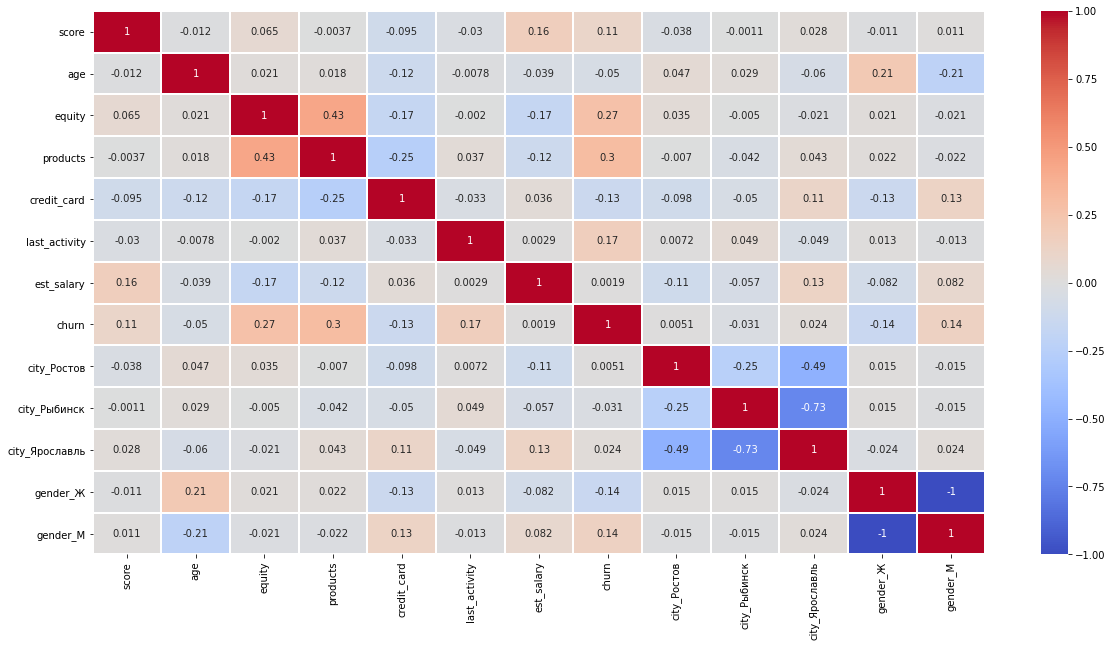

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop(['user_id', 'balance', 'balance_empty'], axis=1).corr(), annot=True, center=0, cmap='coolwarm', linewidths=1);

Шкала Чеддока:  
0,1 - 0,3	Слабая  
0,3 - 0,5	Умеренная  
0,5 - 0,7	Заметная  
0,7 - 0,9	Высокая  
0,9 - 0,99	Весьма высокая  


Согласно шкале Чеддока мы видим весьма высокую связь оттока:  
* со скоринговым рейтингом 0.11  
* с количеством баллов собственности 0.27  
* с активностью клиента 0.17  
* с полом 0.14  

Умеренная зависимость есть с количеством продуктов. С остальными признаками связь очень слабая.  

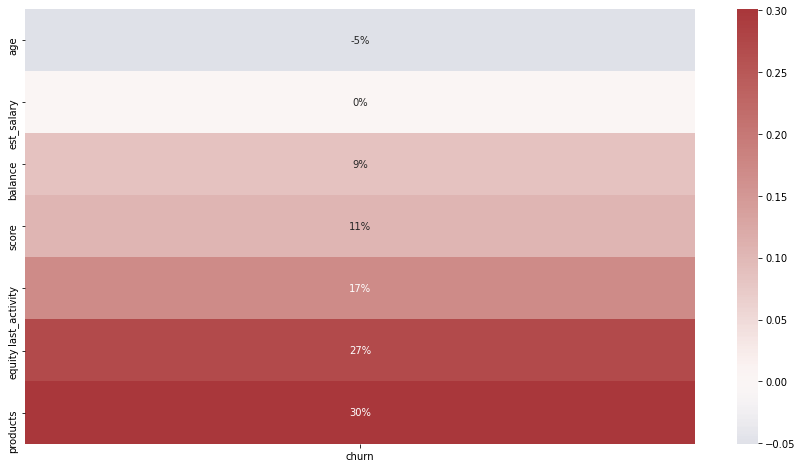

In [25]:
plt.figure(figsize=(15,8)) 
sns.heatmap(data.drop(columns=['user_id', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М', 'balance_empty', 'credit_card'])
            .corr().loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap="vlag", center=0);

**Посмотрим разбивку детальнее**

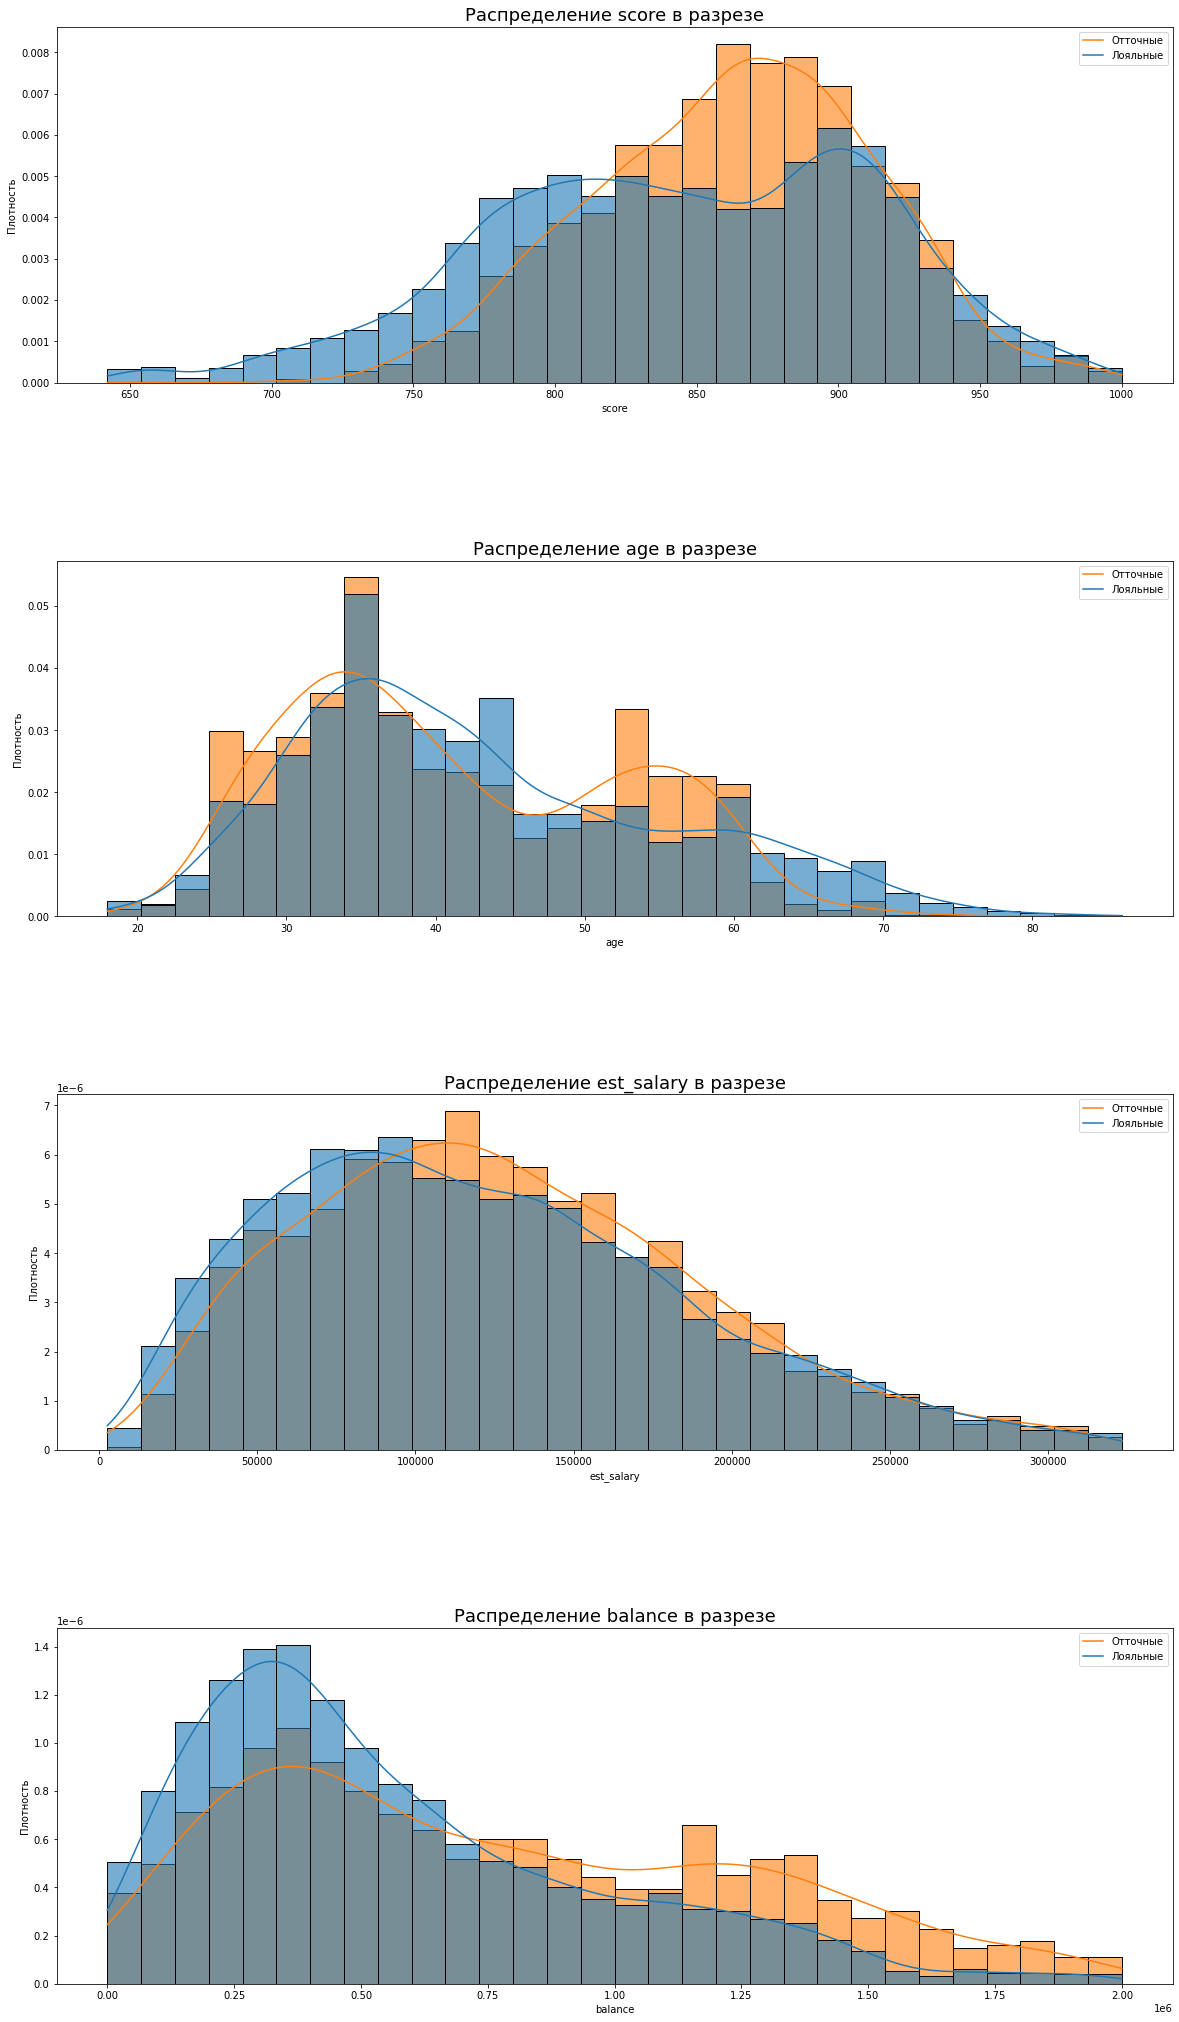

In [29]:
dcolumns = ['score', 'age', 'est_salary', 'balance', 'churn']

dataa = data[dcolumns].copy()

def cc (column):
    qu1 = column.quantile(0.25)
    qu3 = column.quantile(0.75)
    qua = qu3 - qu1
    lqua = qu1 - 1.5 * qua
    uqua = qu3 + 1.5 * qua
    return column[(column >= lqua) & (column <= uqua)]

for column in ['balance', 'est_salary']:
    dataa[column] = cc(dataa[column])
    

fig, axes = plt.subplots(nrows=len(dcolumns) - 1, ncols=1, figsize=(20, 36))
fig.subplots_adjust(hspace=0.5)


for i, cname in enumerate(dcolumns[:-1]):
    ax = axes[i]

    sns.histplot(data=dataa, 
                 x=cname, 
                 hue='churn', 
                 stat="density", 
                 common_norm=False, 
                 kde=True, 
                 ax=ax, 
                 bins=30, 
                 alpha=0.6)

    ax.set_title(f'Распределение {cname} в разрезе', fontsize=18)
    ax.set_xlabel(cname)
    ax.set_ylabel('Плотность')
    ax.legend(labels=['Отточные', 'Лояльные'])

plt.show()


* По кредитному рейтингу основной отток с 820 до 940 (с 910 до 920 отток снижен)  

* По возрасту отток с 25 и снижается к 36 годам. С 50 до 61 снова возрастает  

* По доходу отток происходит со 100000 до 210000 рублей. На уровне 160000 рублей отток не наблюдается  

* Отток клиентов начинается примерно с 750000 рублей.

,sum,count,percent
equity,,,
0,90,2576,3.493789
1,93,773,12.031048
2,166,1051,15.794481
3,321,1540,20.844156
4,464,1847,25.121819
5,576,1915,30.078329
6,58,161,36.024845
7,37,80,46.250000
8,6,17,35.294118


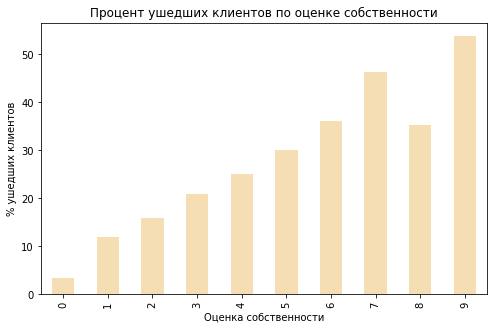

In [31]:
eq_churn = data.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
eq_churn.columns = eq_churn.columns.droplevel(level=1)
eq_churn ['percent'] = eq_churn['sum']/eq_churn['count'] * 100

eq_churn['percent'].plot (kind='bar', title = 'Процент ушедших клиентов по оценке собственности',
    xlabel = 'Оценка собственности', ylabel = '% ушедших клиентов', figsize = (8,5), color = '#F5DEB3');
eq_churn

* Более половины клиентов с оценкой 9 - отточные  
* 46% клиентов с оценкой 7 - отточные  
* Наименее отточные клиенты с оценкой 0, 1 и 2

,sum,count,percent
products,,,
1,235,3323,7.071923
2,978,5119,19.105294
3,297,1038,28.612717
4,300,474,63.291139
5,8,19,42.105263


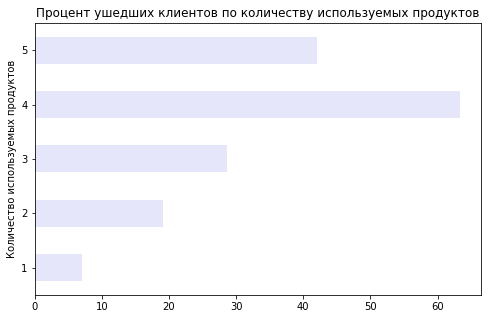

In [33]:
pr_churn = data.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
pr_churn.columns = pr_churn.columns.droplevel(level=1)
pr_churn ['percent'] = pr_churn['sum']/pr_churn['count'] * 100

pr_churn['percent'].plot (
    kind='barh', title = 'Процент ушедших клиентов по количеству используемых продуктов',
    xlabel = 'Количество используемых продуктов', figsize = (8, 5), color = '#E6E6FA');
pr_churn

* Клиенты, у которых 4 продукта, чаще всего отточные - 63%  
* Всего 7% занимают клиенты с 1 продуктом

,sum,count,percent
Мужчина,1183,4991,23.702665
Женщина,635,4982,12.745885


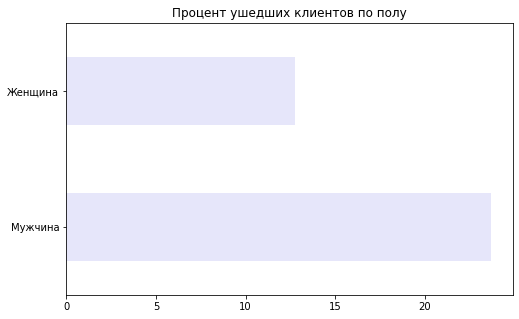

In [35]:
gen_churn = data.pivot_table (index = 'gender_Ж', values = 'churn', aggfunc = ['sum', 'count']) 
gen_churn.columns = gen_churn.columns.droplevel(level=1) 
gen_churn ['percent'] = gen_churn['sum']/gen_churn['count'] * 100 

gen_churn.index = ['Мужчина', 'Женщина']

gen_churn['percent'].plot(kind='barh', title = 'Процент ушедших клиентов по полу', 
           figsize = (8,5), color = '#E6E6FA');

gen_churn

* Мужчины чаще всего в категории отточных

,sum,count,percent
Не активен,541,4758,11.370324
Активен,1277,5215,24.487057


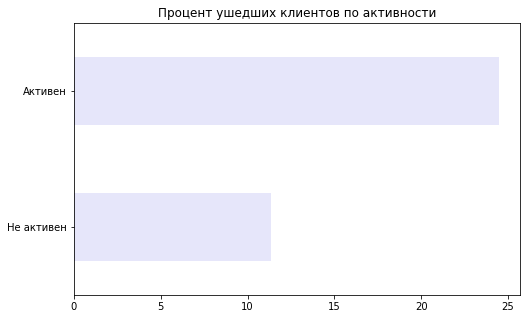

In [37]:
act_churn = data.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count']) 
act_churn.columns = act_churn.columns.droplevel(level=1) 
act_churn ['percent'] = act_churn['sum']/act_churn['count'] * 100 

act_churn.index = ['Не активен', 'Активен']

act_churn['percent'].plot(kind='barh', title = 'Процент ушедших клиентов по активности', 
            figsize = (8,5), color = '#E6E6FA');

act_churn

* Активных клиентов больше. Возможно у них случился негативный опыт, из-за которого они приняли решение уйти

,sum,count,percent
Нет карты,815,3189,25.556601
Есть карта,1003,6784,14.784788


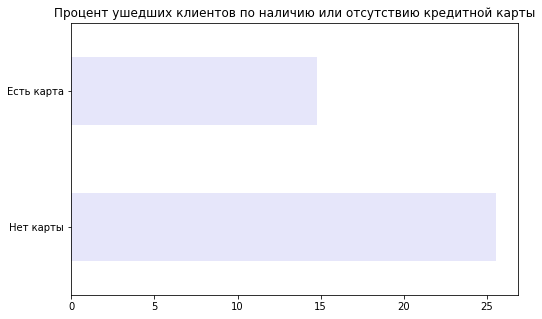

In [39]:
ccard_churn = data.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count']) 
ccard_churn.columns = ccard_churn.columns.droplevel(level=1) 
ccard_churn ['percent'] = ccard_churn['sum']/ccard_churn['count'] * 100 

ccard_churn.index = ['Нет карты', 'Есть карта']

ccard_churn['percent'].plot(kind='barh', title = 'Процент ушедших клиентов по наличию или отсутствию кредитной карты', 
            figsize = (8,5), color = '#E6E6FA');

ccard_churn

* Клиенты без кредитной карты более отточные

,sum,count,percent
Другой город,1382,7291,18.954876
Рыбинск,436,2682,16.256525


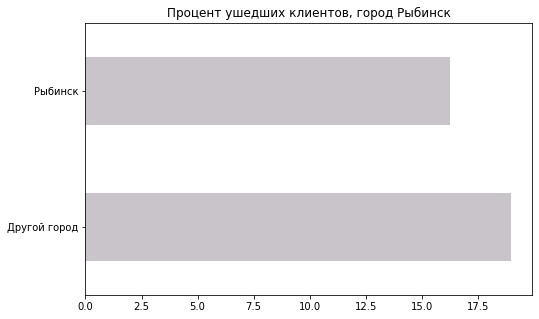

In [40]:
ry_churn = data.pivot_table (index = 'city_Рыбинск', values = 'churn', aggfunc =['sum', 'count'])
ry_churn.columns = ry_churn.columns.droplevel(level=1)
ry_churn ['percent'] = ry_churn['sum']/ry_churn['count'] * 100

ry_churn.index = ['Другой город', 'Рыбинск']

ry_churn['percent'].plot (
    kind='barh', title = 'Процент ушедших клиентов, город Рыбинcк', xlabel = '', ylabel = '% ушедших клиентов', figsize = (8,5), 
    color = '#C9C4CA');
ry_churn

,sum,count,percent
Другой город,1553,8557,18.148884
Ростов,265,1416,18.714689


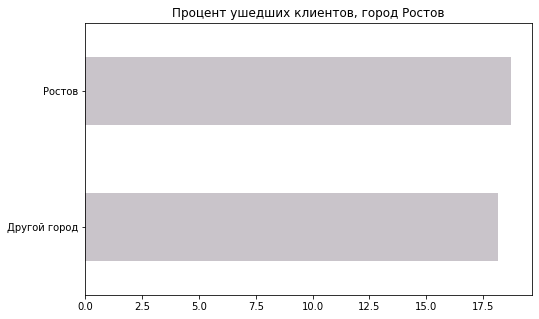

In [41]:
ro_churn = data.pivot_table (index = 'city_Ростов', values = 'churn', aggfunc =['sum', 'count'])
ro_churn.columns = ro_churn.columns.droplevel(level=1)
ro_churn ['percent'] = ro_churn['sum']/ro_churn['count'] * 100

ro_churn.index = ['Другой город', 'Ростов']

ro_churn['percent'].plot (kind='barh', title = 'Процент ушедших клиентов, город Ростов',
    xlabel = '', ylabel = '% ушедших клиентов', figsize = (8,5), color = '#C9C4CA');
ro_churn

,sum,count,percent
Другой город,701,4098,17.105905
Ярославль,1117,5875,19.012766


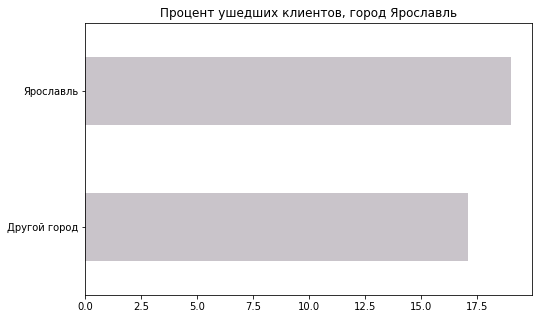

In [42]:
ya_churn = data.pivot_table (index = 'city_Ярославль', values = 'churn', aggfunc =['sum', 'count'])
ya_churn.columns = ya_churn.columns.droplevel(level=1)
ya_churn ['percent'] = ya_churn['sum']/ya_churn['count'] * 100

ya_churn.index = ['Другой город', 'Ярославль']

ya_churn['percent'].plot (
    kind='barh', title = 'Процент ушедших клиентов, город Ярославль',
    xlabel = '', ylabel = '% ушедших клиентов', figsize = (8,5), 
    color = '#C9C4CA');
ya_churn

* Значительной разнцы в городе не обнаружено

In [43]:
mode_age = data[data['churn'] == 1]['age'].mode()[0]
print(f"Мода возраста среди отточных клиентов: {mode_age}")

Мода возраста среди отточных клиентов: 34.0


In [44]:
mode_age_a = data[data['churn'] == 0]['age'].mode()[0]
print(f"Мода возраста среди не отточных клиентов: {mode_age_a}")

Мода возраста среди не отточных клиентов: 36.0


* Значительной разницы в возрасте среди отточных и не отточных клиентов нет

**Выводы:**  

1. Согласно шкале Чеддока мы видим весьма высокую связь оттока:  
  * со скоринговым рейтингом 0.11  
  * с количеством баллов собственности 0.27  
  * с активностью клиента 0.17  
  * с полом 0.14  
  
  
2. По кредитному рейтингу основной отток с 820 до 940 (с 910 до 920 отток снижен)    


3. По возрасту отток с 25 и снижается к 36 годам. С 50 до 61 снова возрастает  


4. По доходу отток происходит со 100000 до 210000 рублей. На уровне 160000 рублей отток не наблюдается  


5. Отток клиентов по балансу начинается примерно с 750000 рублей  


6. Отток по всем городам равномерный  


7. Большинство отточных клиентов без кредитной карты, мужчины, пользовались продуктами банка. Имеют 4 и больше продуктов и оценка собственности выше 7  


In [49]:
def ott(port_first, port_second):
    return ((port_second - port_first) / port_first) * 100

def mode(x):
    return x.mode()

columns = ['score', 'balance', 'last_activity', 'est_salary', 'age',  'equity', 'products', 'credit_card',  'churn']

result = data[columns].groupby('churn').agg({
    'score': ['median', 'mean'],
    'balance': ['median', 'mean'],
    'last_activity': mode,
    'est_salary': ['median', 'mean'],
    'age': ['median', 'mean'],
    'equity': mode,
    'products': mode,
    'credit_card': mode,
    })

for i in ['score', 'balance','est_salary', 'age']:
    result[('Относительная разница', i)] = ott(
        result[(i, 'mean')].loc[1], result[(i, 'mean')].loc[0])

result.round(1)

score          balance            last_activity est_salary            \
      median   mean    median       mean          mode     median      mean   
churn                                                                         
0      848.0  845.4  475410.1   733031.6             0   118227.6  147674.6   
1      866.0  863.4  783908.9  1134458.2             1   125408.9  148357.5   

         age       equity products credit_card Относительная разница          \
      median  mean   mode     mode        mode                 score balance   
churn                                                                          
0       40.0  43.0      0        2           1                  -2.1   -35.4   
1       39.0  41.4      5        2           1                  -2.1   -35.4   

                       
      est_salary  age  
churn                  
0           -0.5  3.8  
1           -0.5  3.8

В результате можем составить следующие портреты клиентов:  

**Лояльные клиенты:**  


* Скоринговый рейтинг: медиана 848. Среднее 845.4  
* Не активный клиент  
* Оценочный доход: медиана 118227.6; Среднее 147674.6	  
* Возраст: медиана 40 лет. Среднее 43 года  
* Баланс: медиана 475410.1; Среднее 733031.6	  
* Количество баллов собственности: 0  
* Количество продуктов: 2  
* Есть кредитная карта  



**Отточные клиенты:**  


* Скоринговый рейтинг: медиана 866. Среднее 863.4 
* Активный клиент  
* Оценочный доход: медиана 125408.9; Среднее 148357.5	  
* Возраст: медиана 39 лет. Среднее 41 год  
* Баланс: медиана 783908.9; Среднее 1134458.2	  
* Количество баллов собственности: 5  
* Количество продуктов: 2  
* Есть кредитная карта  

**Итоги:**  
Есть отличия в активности и оценке собственности.  
А так же значительные отличия в балансе.  

## Проверка статистических гипотез


**Количество продуктов влияет на отток**

Сформулируем нулевую и альтернативную гипотезы. Для проверки проведем t-test

H₀: У отточных и оставшихся клиентов одинаковое среднее количество продуктов  
H₁: У отточных и оставшихся клиентов среднее количество продуктов отличается

In [50]:
results = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.2671065900765871e-138
Отвергаем нулевую гипотезу


Так как выявлена значительная разница между количеством продуктов, проверили, есть ли влияние на отток.  
Гипотезу отвергаем.    

**Доход клиента влияет на отток**

Сформулируем нулевую и альтернативную гипотезы. Для проверки проведем t-test и u-test:

H₀: Уровень дохода у отточных клиентов не отличается от уровня дохода лояльных клиентов  
H₁: Уровни дохода у отточных и лояльных клиентов отличаются

In [51]:
t_statistic, p_value_t = stats.ttest_ind(data[data['churn'] == False]['est_salary'],
                                          data[data['churn'] == True]['est_salary'])

print("Результаты t-теста Стьюдента:")
print(f"T-stat: {t_statistic}")
print(f"P-value: {p_value_t}")

alpha = 0.05

if p_value_t < alpha:
    print("\nСогласно t-тесту Стьюдента, мы отклоняем нулевую гипотезу.")
    print("Отток влияет на доходы клиентов с статистической значимостью.")
else:
    print("\nСогласно t-тесту Стьюдента, мы принимаем нулевую гипотезу.")
    print("Не наблюдается статистически значительное влияние оттока на доходы клиентов.")

Результаты t-теста Стьюдента:
T-stat: -0.18901074940353652
P-value: 0.8500882387258035

Согласно t-тесту Стьюдента, мы принимаем нулевую гипотезу.
Не наблюдается статистически значительное влияние оттока на доходы клиентов.


In [52]:
u_statistic, p_value_u = stats.mannwhitneyu(data[data['churn'] == False]['est_salary'],
                                              data[data['churn'] == True]['est_salary'])

print("\nРезультаты u-теста Манна-Уитни:")
print(f"U-stat: {u_statistic}")
print(f"P-value: {p_value_u}")

alpha = 0.05

if p_value_u < alpha:
    print("\nСогласно u-тесту Манна-Уитни, мы отклоняем нулевую гипотезу.")
    print("Отток влияет на доходы клиентов с статистической значимостью.")
else:
    print("\nСогласно u-тесту Манна-Уитни, мы принимаем нулевую гипотезу.")
    print("Не наблюдается статистически значительное влияние оттока на доходы клиентов.")



Результаты u-теста Манна-Уитни:
U-stat: 6995242.0
P-value: 0.00016830729188229058

Согласно u-тесту Манна-Уитни, мы отклоняем нулевую гипотезу.
Отток влияет на доходы клиентов с статистической значимостью.


Согласно t-test нам необходимо принять гипотезу, что доход не влияет на отток. А u-test говори обратное.  

Т-test предполагает нормальное распределение данных. Он может быть менее эффективен при наличии аномальных значений или выбросов.  
U-test менее чувствителен к форме распределения и может работать с непараметрическими данными. Так же он более устойчив к аномалиям.  

В нашем случае стоит ориентироваться на U-test.  

## Сегментация на основе стратегических показателей

### Первый сегмент

In [57]:
first_seg = data.query('balance >= 350000' 
                       'and (90000 <= est_salary <= 250000)'
                       'and (20 <= age <= 35)'
                       )

res_first_seg = first_seg.agg({'churn': ['mean', 'sum', 'count'],
                                  'age': 'median',
                                  'equity': 'mode',
                                  'balance': 'median',
                                  'products': 'mode',
                                  'credit_card': 'mean',
                                  'last_activity': 'mean',
                                  'est_salary': 'median',
                                  'city_Ростов': 'mean',
                                  'city_Рыбинск': 'mean',
                                  'city_Ярославль': 'mean',
                                  'gender_Ж': 'mean',
                                  'gender_М': 'mean',
                               })

churn_high = data['churn'].mean() * 2

if first_seg['churn'].mean() >= churn_high:
    print('Первый сегмент высокоотточный')
else:
    print('Первый сегмент не высокоотточный')

    
print('Общий размер сегмента:', first_seg['churn'].count())
print('Кол-во отточных клиентов:', first_seg['churn'].sum())
print('Уровень оттока от общего количества в сегменте в процентах:', first_seg['churn'].mean().round(2) * 100, '%')

display(res_first_seg)

Первый сегмент высокоотточный
Общий размер сегмента: 796
Кол-во отточных клиентов: 340
Уровень оттока от общего количества в сегменте в процентах: 43.0 %


,churn,age,equity,balance,products,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
,churn,age,mode,balance,mode,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,796.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.427136,NaN,NaN,NaN,NaN,0.594221,0.55402,NaN,0.104271,0.26005,0.635678,0.438442,0.561558
median,NaN,32.0,NaN,816530.945,NaN,NaN,NaN,130346.42,NaN,NaN,NaN,NaN,NaN
sum,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
first_segment = data.query('balance >= 350000' 
                       'and (90000 <= est_salary <= 250000)'
                       'and (20 <= age <= 35)'
                       )

first_segment.sample(15)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
8247,212054,881.0,29.0,5,1418783.80,2,1,1,207146.28,1,0,0,1,0,1,0
3390,200994,883.0,33.0,4,435744.44,1,1,1,217204.35,1,0,0,1,1,0,0
4650,181348,779.0,35.0,5,549292.03,1,1,0,102073.19,0,0,1,0,1,0,0
9180,119655,783.0,24.0,3,374653.56,2,0,1,109368.29,0,1,0,0,1,0,0
837,161129,932.0,33.0,4,488643.35,2,1,0,170113.42,0,0,0,1,0,1,0
6702,121584,752.0,30.0,3,389316.48,1,1,1,103561.93,0,0,0,1,0,1,0
3461,117239,841.0,35.0,3,417172.56,2,1,0,144273.38,0,0,0,1,1,0,0
9777,148370,906.0,30.0,5,1157856.88,2,0,1,197853.02,1,0,1,0,1,0,0
1973,167309,909.0,28.0,3,916572.32,2,0,1,111752.71,0,0,1,0,1,0,0
6651,179386,938.0,31.0,2,837865.04,2,1,0,174583.80,0,0,0,1,0,1,0


В первом сегменте клиенты в возрасте от 20 до 35 лет, у которых на балансе более 350000 рублей, зарплата от 90 до 250 тысяч рублей.  
Всего 796 клиентов с таким параметрами, из них 340 отточные (43%).  
Медианный возраст 32 года, в большей степени мужчины (56%).  
Медиана баланса больше 816 тысяч рублей.  
Клиенты активные, имеют 2 продукта и в среднем у 59% есть кредитная карта.  
Медиана зарплаты 130 тысяч рублей.  
Большая часть из них из Ярославля (63%), далее Рыбинск и Ростов.

### Второй сегмент

In [59]:
second_seg = data.query('equity in [1, 2, 3, 4, 5, 6, 7, 8, 9]' 
                        'and (50 <= age <= 60)'
                        'and credit_card == 0' 
                           )

res_second_seg = second_seg.agg({'churn': ['mean', 'sum', 'count'],
                                  'age': 'median',
                                  'equity': 'mode',
                                  'balance': 'median',
                                  'products': 'mode',
                                  'credit_card': 'mean',
                                  'last_activity': 'mean',
                                  'est_salary': 'median',
                                  'city_Ростов': 'mean',
                                  'city_Рыбинск': 'mean',
                                  'city_Ярославль': 'mean',
                                  'gender_Ж': 'mean',
                                  'gender_М': 'mean',
                               })

churn_high = data['churn'].mean() * 2

if second_seg['churn'].mean() >= churn_high:
    print('Второй сегмент высокоотточный')
else:
    print('Второй сегмент не высокоотточный')

    
print('Общий размер сегмента:', second_seg['churn'].count())
print('Кол-во отточных клиентов:', second_seg['churn'].sum())
print('Уровень оттока от общего количества в сегменте в процентах:', second_seg['churn'].mean().round(2) * 100, '%')

display(res_second_seg)

Второй сегмент высокоотточный
Общий размер сегмента: 579
Кол-во отточных клиентов: 238
Уровень оттока от общего количества в сегменте в процентах: 41.0 %


,churn,age,equity,balance,products,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
,churn,age,mode,balance,mode,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,579.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.411054,NaN,NaN,NaN,NaN,0.0,0.568221,NaN,0.200345,0.297064,0.502591,0.607945,0.392055
median,NaN,55.0,NaN,843993.455,NaN,NaN,NaN,102531.03,NaN,NaN,NaN,NaN,NaN
sum,238.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
second_segment = data.query('equity in [1, 2, 3, 4, 5, 6, 7, 8, 9]' 
                        'and (50 <= age <= 60)'
                        'and credit_card == 0' 
                           )
second_segment.sample(15)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
7917,216963,882.0,60.0,4,1560212.11,3,0,0,235995.97,0,0,0,1,0,1,0
6592,226143,846.0,60.0,3,299567.30,2,0,0,75018.03,0,0,0,1,1,0,0
2277,206171,804.0,53.0,4,500628.26,2,0,1,56783.00,0,0,0,1,1,0,0
6958,170745,834.0,51.0,4,508501.78,2,0,1,206187.64,1,0,0,1,1,0,0
2533,193056,814.0,58.0,4,1385924.10,3,0,0,116923.34,0,0,1,0,1,0,0
3188,153531,827.0,56.0,4,470699.76,2,0,1,115944.08,0,0,1,0,0,1,0
3244,223316,841.0,54.0,2,308874.40,2,0,0,51699.69,0,0,0,1,1,0,0
535,125838,776.0,52.0,2,246646.73,2,0,1,74338.22,0,1,0,0,1,0,0
1087,199069,806.0,57.0,4,774820.10,2,0,1,82233.74,0,0,0,1,1,0,0
1759,191710,851.0,55.0,4,975440.53,2,0,0,60232.36,0,0,1,0,0,1,0


Во втором сегменте клиенты от 50 до 60 лет без кредитной карты. Оценка собственности от 1 до 9.  
Всего 570 клиентов с такими параметрами, из них 238 отточные (43%).  
Медианный возраст 55 лет с доходом 102 тысячи рублей и балансов более 840 тысяч рублей.  
Женщин 60%. Из Ярославля 50% клиентов, далее Рыбинск и Ростов.  
Чаще всего у клиентов 2 продукта.  
Более половины клиентов пользовались продуктом.  


### Третий сегмент

In [61]:
third_seg = data.query('(840 <= score  <= 1000)'
                      'and last_activity == 1'
                      'and gender_М'
                      )

res_third_seg = third_seg.agg({'churn': ['mean', 'sum', 'count'],
                                  'age': 'median',
                                  'equity': 'mode',
                                  'balance': 'median',
                                  'products': 'mode',
                                  'credit_card': 'mean',
                                  'last_activity': 'mean',
                                  'est_salary': 'median',
                                  'city_Ростов': 'mean',
                                  'city_Рыбинск': 'mean',
                                  'city_Ярославль': 'mean',
                                  'gender_Ж': 'mean',
                                  'gender_М': 'mean',
                               })

churn_high = data['churn'].mean() * 2

if third_seg['churn'].mean() >= churn_high:
    print('Третий сегмент высокоотточный')
else:
    print('Третий сегмент не высокоотточный')

    
print('Общий размер сегмента:', third_seg['churn'].count())
print('Кол-во отточных клиентов:', third_seg['churn'].sum())
print('Уровень оттока от общего количества в сегменте в процентах:', third_seg['churn'].mean().round(2) * 100, '%')

display(res_third_seg)

Третий сегмент высокоотточный
Общий размер сегмента: 1392
Кол-во отточных клиентов: 545
Уровень оттока от общего количества в сегменте в процентах: 39.0 %


,churn,age,equity,balance,products,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
,churn,age,mode,balance,mode,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,1392.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.391523,NaN,NaN,NaN,NaN,0.658046,1.0,NaN,0.118534,0.292385,0.58908,0.0,1.0
median,NaN,37.0,NaN,846750.205,NaN,NaN,NaN,146969.415,NaN,NaN,NaN,NaN,NaN
sum,545.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
third_segment = data.query('(840 <= score  <= 1000)'
                      'and last_activity == 1'
                      'and gender_М'
                      )
third_segment.sample(10)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,balance_empty
1518,226760,893.0,32.0,0,NaN,1,1,1,96363.29,0,0,1,0,0,1,1
3779,226536,890.0,57.0,4,1134333.91,2,0,1,168163.08,1,0,1,0,0,1,0
3356,195785,908.0,24.0,4,1450392.90,2,1,1,105294.37,0,0,1,0,0,1,0
1537,155522,907.0,41.0,5,782410.47,2,0,1,89811.26,1,0,1,0,0,1,0
7428,223427,910.0,34.0,4,380908.28,4,1,1,163310.47,1,0,1,0,0,1,0
9009,185535,868.0,32.0,4,734022.75,2,1,1,162880.64,1,0,0,1,0,1,0
5686,186778,896.0,53.0,3,1671890.94,2,0,1,77963.62,1,0,1,0,0,1,0
5775,225423,889.0,26.0,4,258624.73,4,1,1,42198.35,0,0,0,1,0,1,0
9460,192226,851.0,22.0,3,62759.82,1,1,1,108911.33,1,0,1,0,0,1,0
35,221927,863.0,39.0,5,1461423.33,1,0,1,221699.52,0,1,0,0,0,1,0


В третьем сегменте мужчины, которые пользовались продуктами банка и имеют скоринговый рейтинг выше 840.  
Всего 1392 клиента с такими параметрами. Из них 545 отточные (39%). 
Средний возраст 37 лет.  
Медианный баланс более 800 тысяч рублей.  
Зарплата более 140000 рублей.  
Большая часть из них из Ярославля, далее Рыбинск и Ростов.  

## Выводы и рекомендации

1. Наличие денег на балансе влияет на решение клиента уйти.
2. Чем выше оценка собственности, тем чаще клиент уходит. Самый высокий отток с оценкой 9.
3. Основная масса отточных клиентов с кредитным рейтингом выше 970.
4. Клиенты, у которых 4 или 5 продуктов в банке, уходят чаще.
5. В категории отточных мужчин больше примерно в 2 раза.
6. Клиенты, которые пользовались продуктами, или у которых нет кредитной карты, уходят чаще.
7. Город не влияет на отток. Во всех трех городах клиенты уходят равномерно.
8. Проверили гипотезу, что количество продуктов в банке не влияет на решение уйти. Гипотезу о том, что у отточных и оставшихся клиентов одинаковое количество продуктов, отвергнули.  
9. Проверили гипотезу о влиянии дохода на отток -  влияние подтверждено.


**Общие рекомендации:** 

* Большинство людей ценят свое время и они хотят везде все успеть. Поэтому важно развивать онлайн сервисы. Провести повышение квалификации сотрудников банка. На сайте банка или в приложении сделать раздел "вопрос-ответ" на самые часто задаваемые вопросы.  
* Убирать невостребованные продукты и продвигать текущие. Развивать новые направления.  
* Рассмотреть детский продукт.  Например, оформление дебетовой карты с 14 лет, чтобы родители могли с легкостью сделать ребенку перевод.  

**Параметры первого сегмента:** 
  * В первом сегменте клиенты в возрасте от 20 до 35 лет, у которых на балансе более 350000 рублей, зарплата от 90 до 250 тысяч рублей.  
  * Всего 796 клиентов с таким параметрами, из них 340 отточные (43%).  
  * Медианный возраст 32 года, в большей степени мужчины (56%).  
  * Медиана баланса больше 816 тысяч рублей.  
  * Клиенты активные, имеют 2 продукта и в среднем у 59% есть кредитная карта.  
  * Медиана зарплаты 130 тысяч рублей.  
  * Большая часть из них из Ярославля (63%), далее Рыбинск и Ростов. 
  * У 59% есть кредитная карта.  
  
Рекомендации:  

  * Предложить получать зарплату на карту банка. 
  * Рассказать о преимуществах кредитной карты. 
  * Предлагать акции на покупку билетов на фестивали, концерты. Авиа и железнодорожные билеты, отели.  


**Параметры второго сегмента:**


* Во втором сегменте клиенты от 50 до 60 лет без кредитной карты. Оценка собственности от 1 до 9.  
* Всего 570 клиентов с такими параметрами, из них 238 отточные (43%).  
* Медианный возраст 55 лет с доходом 102 тысячи рублей и балансов более 840 тысяч рублей.  
* Женщин 60%. Из Ярославля 50% клиентов, далее Рыбинск и Ростов.  
* Чаще всего у клиентов 2 продукта.  
* Более половины клиентов пользовались продуктом.  

Рекомендации:  

* Предложить получать пенсию на карту.  
* Предложить акции на покупки в аптеках, медицинских учреждениях, санаториях,  покупки для дома и дачи. Женщинам так же предложить акции в категориях красота и уход за собой.
* Рассказать о преимуществах вклада. Можно предложить разовый бонус за первичное пополнение вклада.  

**Параметры третьего сегмента:**

* В третьем сегменте мужчины, которые пользовались продуктами банка и имеют скоринговый рейтинг выше 840.  
* Всего 1392 клиента с такими параметрами. Из них 545 отточные (39%). Средний возраст 37 лет.  
* Медианный баланс более 800 тысяч рублей.  
* Зарплата более 140000 рублей.  
* Большая часть из них из Ярославля, далее Рыбинск и Ростов. 
* У 65% есть кредитная карта.  

Рекомендации:  

* Рассказать о преимуществах вклада. Можно предложить разовый бонус за первичное пополнение вклада.  
* Предложить получать зарплату на карту.  
* Рассказать о преимуществах кредитной карты.  
* Предложить акции в категории авто, заправки.  